<a href="https://colab.research.google.com/github/johnnyclayton/happiness_report/blob/main/Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Happiness Report 2022**

In [83]:
from google.colab import files
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import geopandas as gpd

In [84]:
uploaded = files.upload()

Saving 2022.csv to 2022.csv


In [85]:
data = pd.read_csv("/content/2022.csv")
# dropping last row
data.drop(data.tail(1).index,inplace=True)

In [86]:
world_happiness = data
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Type of DataFrame :  <class 'geopandas.geodataframe.GeoDataFrame'>


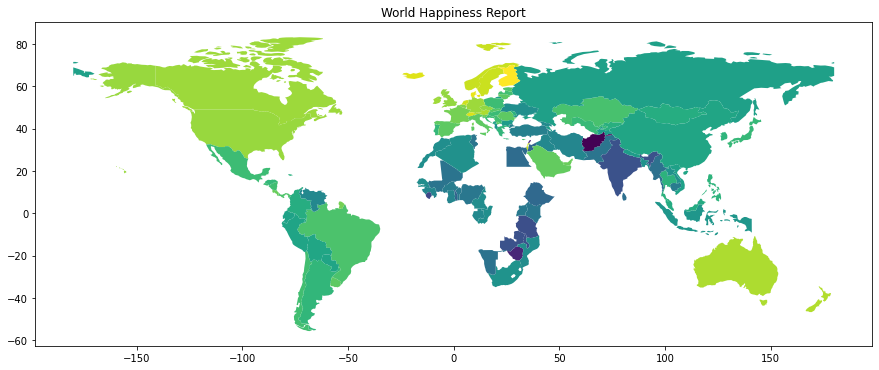

In [91]:
%matplotlib inline
world_happiness_final = world.merge(world_happiness, how="left", left_on=['name'], right_on=['Country'])
print("Type of DataFrame : ", type(world_happiness_final))
#world_happiness_final.head()
world_happiness_final.plot("Happiness score", figsize=(15,10))
plt.title("World Happiness Report");

<BarContainer object of 10 artists>

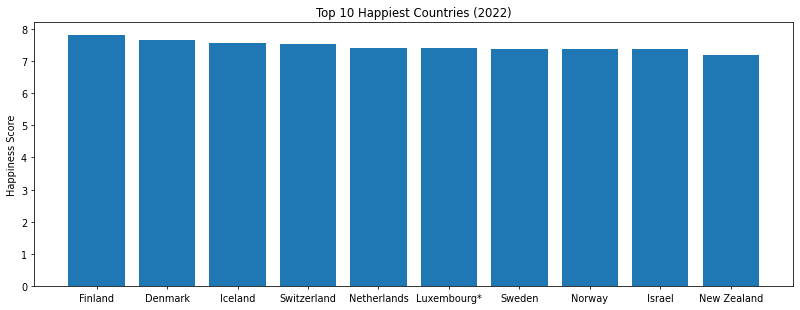

In [10]:
%matplotlib inline

interval = 10
figure(figsize=(14,5),dpi=70)
plt.title("Top 10 Happiest Countries (2022)")
plt.ylabel("Happiness Score")
score = data["Happiness score"].head(interval)
country = data["Country"].head(interval)
plt.bar(country,score)

In [11]:
# Maximum GDP per capita
gdp_max = data['GDP per capita'].max()
data[data['GDP per capita'] == gdp_max]

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
5,6,Luxembourg*,7.404,7.501,7.307,2.042,2.209,1.155,0.79,0.7,0.12,0.388


In [12]:
# Minimum GDP per capita
gdp_min = data['GDP per capita'].min()
data[data['GDP per capita'] == gdp_min]

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
107,108,Venezuela,4.925,5.051,4.8,2.79,0.0,0.968,0.578,0.283,0.225,0.082


In [13]:
# Position of Brazil
data[data["Country"] == "Brazil"]

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
37,38,Brazil,6.293,6.384,6.202,2.361,1.462,1.044,0.615,0.546,0.131,0.134


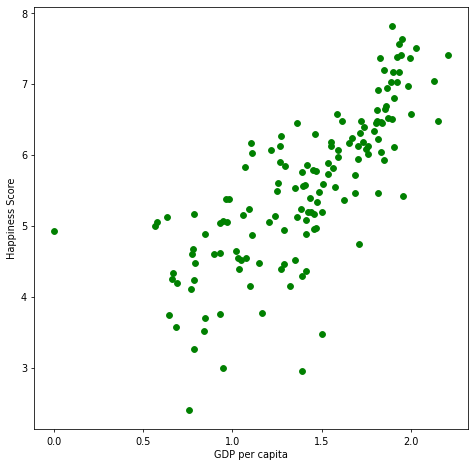

In [14]:
%matplotlib inline

figure(figsize=(8,8),dpi=70)
plt.xlabel("GDP per capita")
plt.ylabel("Happiness Score")
score = data["Happiness score"]
gdp = data["GDP per capita"]
plt.scatter(gdp,score,color="green")

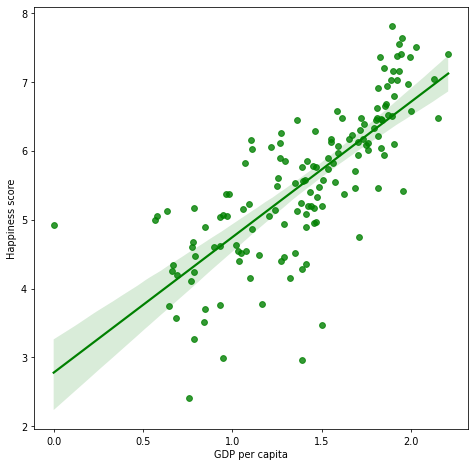

In [15]:
figure(figsize=(8,8),dpi=70)
sns.regplot(x = 'GDP per capita',y = 'Happiness score', data = data,color="green")

In [16]:
reg = linear_model.LinearRegression()
x = data[['GDP per capita']].values
y = data['Happiness score']
reg.fit(x,y)

LinearRegression()

In [17]:
b0 = float(reg.intercept_)
b1 = float(reg.coef_)
r_squared = reg.score(x,y)

print(f"The regression line is: happiness = {round(b0,4)} + {round(b1,4)}*gdp per capita \nR2 is {round(r_squared,4)}")



The regression line is: happiness = 2.7773 + 1.9684*gdp per capita 
R2 is 0.5832
